In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt




In [3]:
data = pd.read_csv('BITRE_Fatality-Table 1.csv')
data.head()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3686/1511047806.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')


Crash ID State  Month  Year Dayweek   Time Crash Type Bus Involvement  \
0  20245021    WA      4  2024  Friday  00:31     Single              No   
1  20245021    WA      4  2024  Friday  00:31     Single              No   
2  20245021    WA      4  2024  Friday  00:31     Single              No   
3  20245021    WA      4  2024  Friday  00:31     Single              No   
4  20243023   Qld      4  2024  Friday  01:00     Single              No   

  Heavy Rigid Truck Involvement Articulated Truck Involvement  ... Age  \
0                            No                            No  ...  19   
1                            No                            No  ...   9   
2                            No                            No  ...  21   
3                            No                            No  ...  45   
4                            No                            No  ...  24   

  National Remoteness Areas SA4 Name 2021  National LGA Name 2021  \
0                       NaN           NaN                     NaN   
1                       NaN           NaN                     NaN   
2                       NaN           NaN                     NaN   
3                       NaN           NaN                     NaN   
4  Outer Regional Australia        Cairns                  Cairns   

  National Road Type Christmas Period Easter Period Age Group Day of week  \
0                NaN               No            No  17_to_25     Weekday   
1                NaN               No            No   0_to_16     Weekday   
2                NaN               No            No  17_to_25     Weekday   
3                NaN               No            No  40_to_64     Weekday   
4         Local Road               No            No  17_to_25     Weekday   

  Time of day  
0       Night  
1       Night  
2       Night  
3       Night  
4       Night  

[5 rows x 23 columns]

01:36:49 - cmdstanpy - INFO - Chain [1] start processing
01:36:49 - cmdstanpy - INFO - Chain [1] done processing
01:36:50 - cmdstanpy - INFO - Chain [1] start processing
01:36:50 - cmdstanpy - INFO - Chain [1] done processing
01:36:50 - cmdstanpy - INFO - Chain [1] start processing
01:36:50 - cmdstanpy - INFO - Chain [1] done processing
01:36:50 - cmdstanpy - INFO - Chain [1] start processing
01:36:50 - cmdstanpy - INFO - Chain [1] done processing
01:36:50 - cmdstanpy - INFO - Chain [1] start processing
01:36:50 - cmdstanpy - INFO - Chain [1] done processing
01:36:51 - cmdstanpy - INFO - Chain [1] start processing
01:36:51 - cmdstanpy - INFO - Chain [1] done processing
01:36:51 - cmdstanpy - INFO - Chain [1] start processing
01:36:51 - cmdstanpy - INFO - Chain [1] done processing


Evaluation Metrics for the Test Period (2023) - Age Group:
0_to_16 - MAE: 1.32, MSE: 3.62, MAPE: 28.87%, R2: 0.01
Forecast vs Actual for first three months of 2024 for 0_to_16:
            ds      yhat  yhat_lower  yhat_upper
418 2024-01-01  3.638106   -2.395687   10.482424
419 2024-02-01  3.127845   -3.285110    9.825739
420 2024-03-01  3.508355   -3.094429   10.042050
        Date  Counts
0 2024-01-01       6
1 2024-02-01       6
2 2024-03-01       4

Forecast for 0_to_16 in 2030:
            ds      yhat  yhat_lower  yhat_upper
491 2030-01-31  2.549996   -3.953376    9.107025
492 2030-02-28  4.984701   -1.211454   11.571062
493 2030-03-31  2.501207   -3.444194    9.373718
494 2030-04-30  0.575207   -5.541038    7.323400
495 2030-05-31  2.771844   -3.824754    8.868517
496 2030-06-30  2.478815   -3.846884    8.925217
497 2030-07-31  5.926450   -0.770750   12.443551
498 2030-08-31  3.327253   -2.936140    9.883844
499 2030-09-30  2.983845   -3.137264    9.545454
500 2030-10-31  1.8923

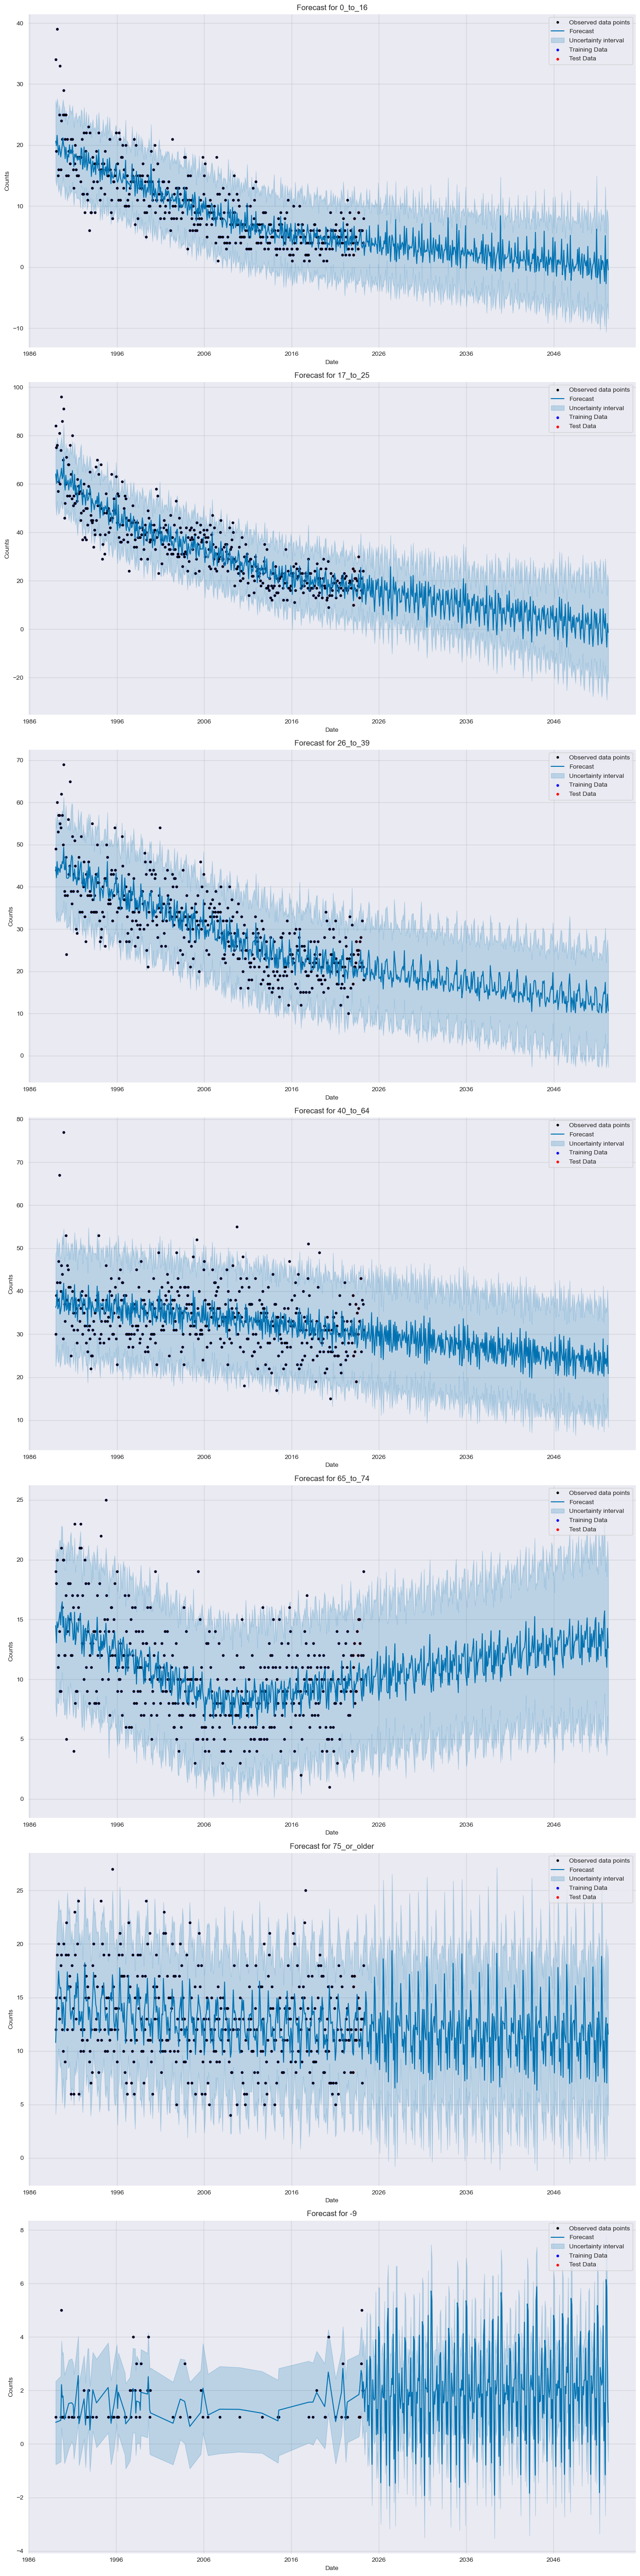

Dickey-Fuller Test Results:

Time of day: 0_to_16
ADF Statistic: -2.6799851452392778
p-value: 0.07756621043915206
Critical Value 1%: -3.4462831955497135
Critical Value 5%: -2.8685636962704395
Critical Value 10%: -2.5705114078759914

Time of day: 17_to_25
ADF Statistic: -3.117978049331433
p-value: 0.02525102481119954
Critical Value 1%: -3.4464400156784927
Critical Value 5%: -2.868632644097719
Critical Value 10%: -2.5705481612974577

Time of day: 26_to_39
ADF Statistic: -3.4719009002712466
p-value: 0.008738753190971326
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: 40_to_64
ADF Statistic: -8.2726072020515
p-value: 4.748620218008186e-13
Critical Value 1%: -3.445978550826048
Critical Value 5%: -2.8684297456394874
Critical Value 10%: -2.570440005247093

Time of day: 65_to_74
ADF Statistic: -2.349454995388476
p-value: 0.15651321558724945
Critical Value 1%: -3.4464400156784927
Critical Value 5%: -2.86863264409

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true)).mean() * 100

# Convert the 'Year' and 'Month' columns to a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Filter data up to 2022 for training and 2023 for testing
train_data = data[data['Year'] <= 2022]
test_data = data[data['Year'] == 2023]

# Aggregate the number of occurrences of each feature per month for training data
def aggregate_counts(data, feature):
    return data.groupby(['Date', feature]).size().reset_index(name='Counts')

# Prepare the data for Prophet and forecast
def forecast_feature(data, feature):
    counts = aggregate_counts(data, feature)
    
    models = {}
    forecasts = {}
    for value in counts[feature].unique():
        value_data = counts[counts[feature] == value]
        value_data = value_data[['Date', 'Counts']].rename(columns={'Date': 'ds', 'Counts': 'y'})

        # Initialize and fit the Prophet model
        model = Prophet(interval_width=0.95,
                        yearly_seasonality=True,
                        daily_seasonality=True,
                        weekly_seasonality=True,
                        seasonality_mode='additive')
        model.fit(value_data)
        models[value] = model

        # Create a dataframe for future dates including 2023 (test period) and beyond
        future_dates = model.make_future_dataframe(periods=(2050 - 2022) * 12, freq='M')

        # Predict future values
        forecast = model.predict(future_dates)
        forecasts[value] = forecast
    
    return models, forecasts

# Forecast for a specific feature
feature = 'Age Group'  # Change this to the desired feature
time_of_day_models, forecasts = forecast_feature(data, feature)

# Calculate and print evaluation metrics for the test period (2023)
print(f"Evaluation Metrics for the Test Period (2023) - {feature}:")
for value, forecast in forecasts.items():
    # Filter forecast for 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]

    # Filter actual counts for 2023
    actual_counts_2023 = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    actual_counts_2023 = actual_counts_2023.rename(columns={'Date': 'ds', 'Counts': 'y'})

    # Ensure the forecast and actual data are aligned
    forecast_2023 = forecast_2023.set_index('ds').loc[actual_counts_2023['ds']].reset_index()

    # Calculate evaluation metrics
    mae = mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mse = mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mape = mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat'])
    r2 = r2_score(actual_counts_2023['y'], forecast_2023['yhat'])

    print(f"{value} - MAE: {mae:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%, R2: {r2:.2f}")
    print(f"Forecast vs Actual for first three months of 2024 for {value}:")
    future_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(future_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Filter actual counts for first three months of 2024
    actual_counts_2024 = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2024-03-31') & (data[feature] == value)]
    actual_counts_2024 = actual_counts_2024.groupby('Date').size().reset_index(name='Counts')
    print(actual_counts_2024)
    print()

    # Print forecast for 2030, 2040, and 2050
    future_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    future_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    future_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    
    print(f"Forecast for {value} in 2030:")
    print(future_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2040:")
    print(future_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2050:")
    print(future_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()

# Plot the forecasts
fig, axes = plt.subplots(nrows=len(forecasts), ncols=1, figsize=(14, 8*len(forecasts)))

for ax, (value, forecast) in zip(axes, forecasts.items()):
    model = time_of_day_models[value]
    model.plot(forecast, ax=ax, xlabel='Date', ylabel='Counts')
    
    # Plot training data
    train_time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    ax.scatter(train_time_data['Date'], train_time_data['Counts'], color='blue', s=10, label='Training Data')
    
    # Plot test data
    test_time_data = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    ax.scatter(test_time_data['Date'], test_time_data['Counts'], color='red', s=10, label='Test Data')
    
    ax.legend()
    ax.set_title(f'Forecast for {value}')

# Show the plot
plt.tight_layout()
plt.show()

# Save the plot

# Perform Dickey-Fuller Test
print("Dickey-Fuller Test Results:")
for value, forecast in forecasts.items():
    time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    adf_result = adfuller(time_data['Counts'])
    print(f"\nTime of day: {value}")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    for key, value in adf_result[4].items():
        print(f"Critical Value {key}: {value}")

# Print actual counts for each year from 2013 to 2023
print("\nActual Counts per Year (2013-2023):")
for year in range(2013, 2024):
    year_counts = data[data['Year'] == year].groupby('Year').size().reset_index(name='Counts')
    print(f"Year {year}: {year_counts['Counts'].sum()} counts")


In [3]:
data['National Remoteness Areas'].value_counts()

Major Cities of Australia    3631
Inner Regional Australia     3440
Outer Regional Australia     2372
Unknown                      1676
Very Remote Australia         456
Remote Australia              453
Name: National Remoteness Areas, dtype: int64

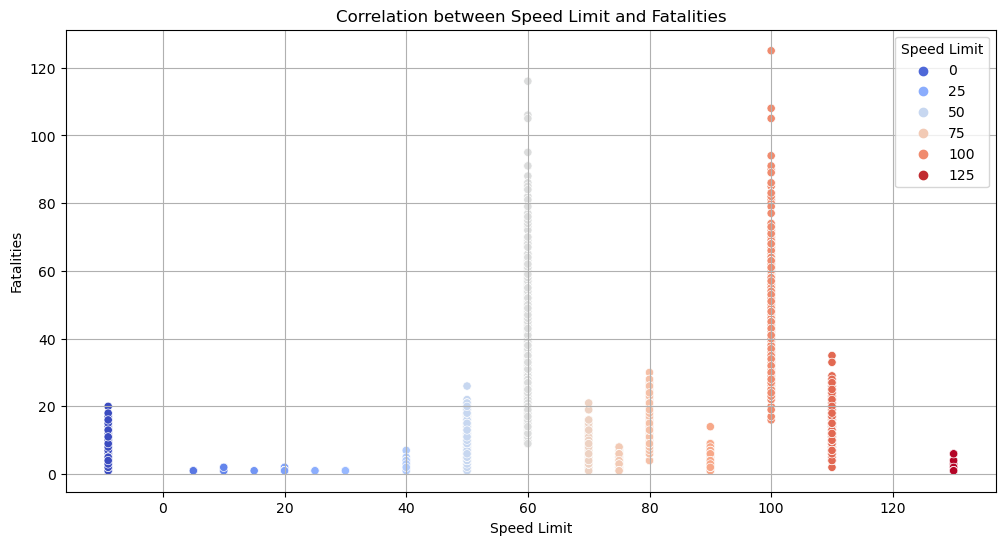

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# پاک‌سازی ستون "Speed Limit"
def clean_speed_limit(value):
    if isinstance(value, str):
        if '<' in value:
            return int(value.replace('<', ''))
        elif '>' in value:
            return int(value.replace('>', ''))
    try:
        return int(value)
    except ValueError:
        return None  # در صورت ناتوانی در تبدیل، مقدار None بازگردانده می‌شود

data['Speed Limit'] = data['Speed Limit'].apply(clean_speed_limit)

# حذف مقادیر نان
data = data.dropna(subset=['Speed Limit'])

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# تجمیع داده‌ها بر اساس تاریخ و سرعت
fatalities_by_speed_month = data.groupby(['Date', 'Speed Limit']).size().reset_index(name='Fatalities')

# رسم نمودار همبستگی
plt.figure(figsize=(12, 6))
sns.scatterplot(data=fatalities_by_speed_month, x='Speed Limit', y='Fatalities', hue='Speed Limit', palette='coolwarm')
plt.title('Correlation between Speed Limit and Fatalities')
plt.xlabel('Speed Limit')
plt.ylabel('Fatalities')
plt.grid(True)
plt.show()


00:37:38 - cmdstanpy - INFO - Chain [1] start processing
00:37:38 - cmdstanpy - INFO - Chain [1] done processing


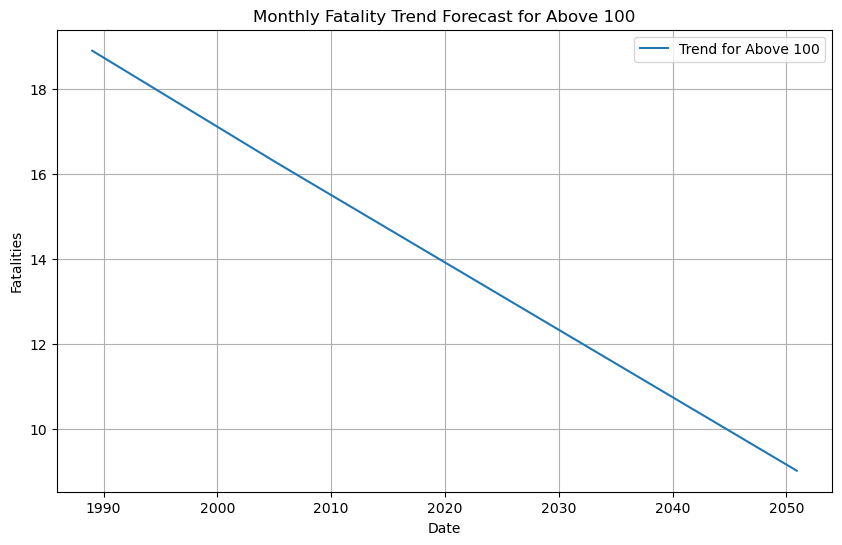

00:37:38 - cmdstanpy - INFO - Chain [1] start processing
00:37:38 - cmdstanpy - INFO - Chain [1] done processing


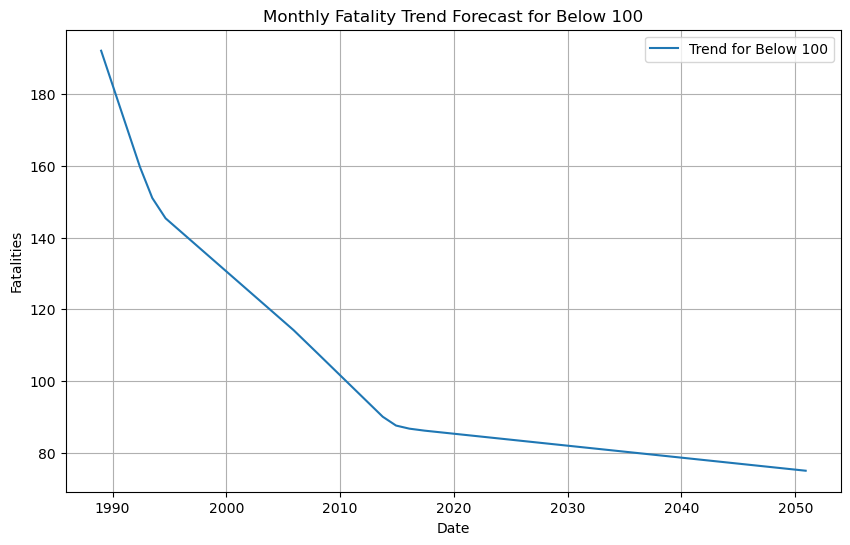

In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt



# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

# پاک‌سازی ستون "Speed Limit"
def clean_speed_limit(value):
    if isinstance(value, str):
        if '<' in value:
            return int(value.replace('<', ''))
        elif '>' in value:
            return int(value.replace('>', ''))
    try:
        return int(value)
    except ValueError:
        return None  # در صورت ناتوانی در تبدیل، مقدار None بازگردانده می‌شود

data['Speed Limit'] = data['Speed Limit'].apply(clean_speed_limit)

# حذف مقادیر نان
data = data.dropna(subset=['Speed Limit'])

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# دسته‌بندی داده‌ها بر اساس محدودیت سرعت
data['Speed_Category'] = data['Speed Limit'].apply(lambda x: 'Above 100' if x > 100 else 'Below 100')

# تجمیع داده‌ها بر اساس تاریخ و دسته‌بندی محدودیت سرعت
fatalities_by_speed_month = data.groupby(['Date', 'Speed_Category']).size().reset_index(name='Fatalities')

# آماده‌سازی یک دیکشنری برای ذخیره پیش‌بینی‌ها
forecasts = {}

# لیست دسته‌بندی‌های سرعت در دیتاست
speed_categories = fatalities_by_speed_month['Speed_Category'].unique()

# افق پیش‌بینی (ماه‌ها)
latest_date = fatalities_by_speed_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

for speed_category in speed_categories:
    # آماده‌سازی داده‌ها برای Prophet
    speed_data = fatalities_by_speed_month[fatalities_by_speed_month['Speed_Category'] == speed_category][['Date', 'Fatalities']]
    speed_data.columns = ['ds', 'y']

    # ایجاد و آموزش مدل Prophet
    model = Prophet(
        interval_width=0.95,
        yearly_seasonality=True,
        daily_seasonality=False,
        weekly_seasonality=False
    )
    model.fit(speed_data)

    # ایجاد یک DataFrame برای نگهداری تاریخ‌های آینده
    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')

    # انجام پیش‌بینی
    forecast = model.predict(future)

    # ذخیره پیش‌بینی در دیکشنری
    forecasts[speed_category] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # استخراج پیش‌بینی‌های ترند
    trend = forecast[['ds', 'trend']]
    
    # رسم نمودار پیش‌بینی ترند
    plt.figure(figsize=(10, 6))
    plt.plot(trend['ds'], trend['trend'], label=f'Trend for {speed_category}')
    plt.title(f'Monthly Fatality Trend Forecast for {speed_category}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.legend()
    plt.grid(True)
    #plt.savefig(f'trend_forecast_{speed_category}.png')  # ذخیره نمودار به عنوان فایل تصویر
    plt.show()


00:35:03 - cmdstanpy - INFO - Chain [1] start processing
00:35:04 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Above 100 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  15.449468    6.720303   25.099761
421 2024-02-01   9.213214    0.027344   19.027192
422 2024-03-01  14.316161    5.389803   23.683555


<Figure size 1000x600 with 0 Axes>

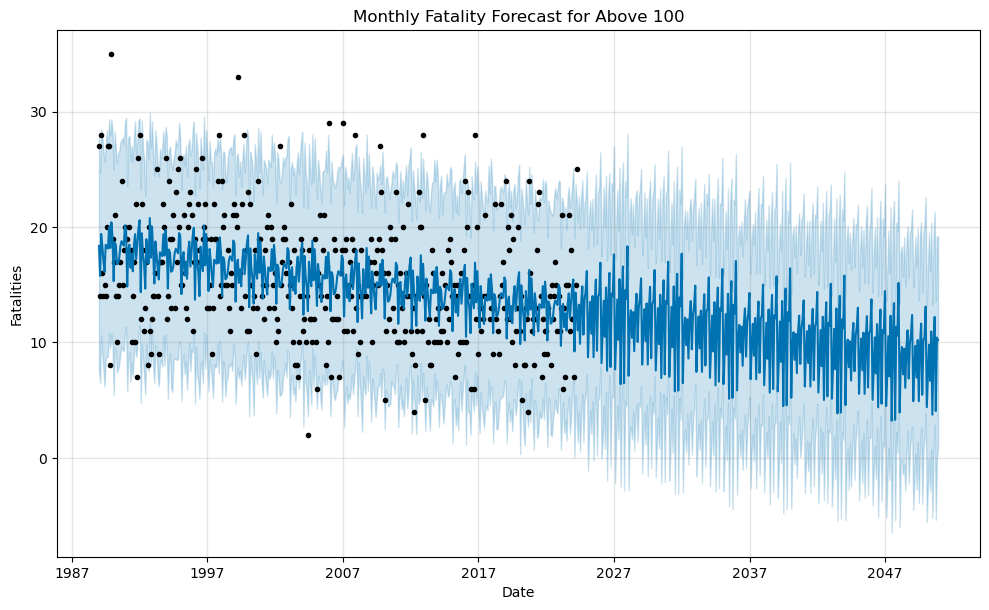

00:35:04 - cmdstanpy - INFO - Chain [1] start processing
00:35:04 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Below 100 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  76.203765   48.420116  102.145496
421 2024-02-01  74.066452   47.246869  100.643655
422 2024-03-01  87.745403   60.826486  113.617240


<Figure size 1000x600 with 0 Axes>

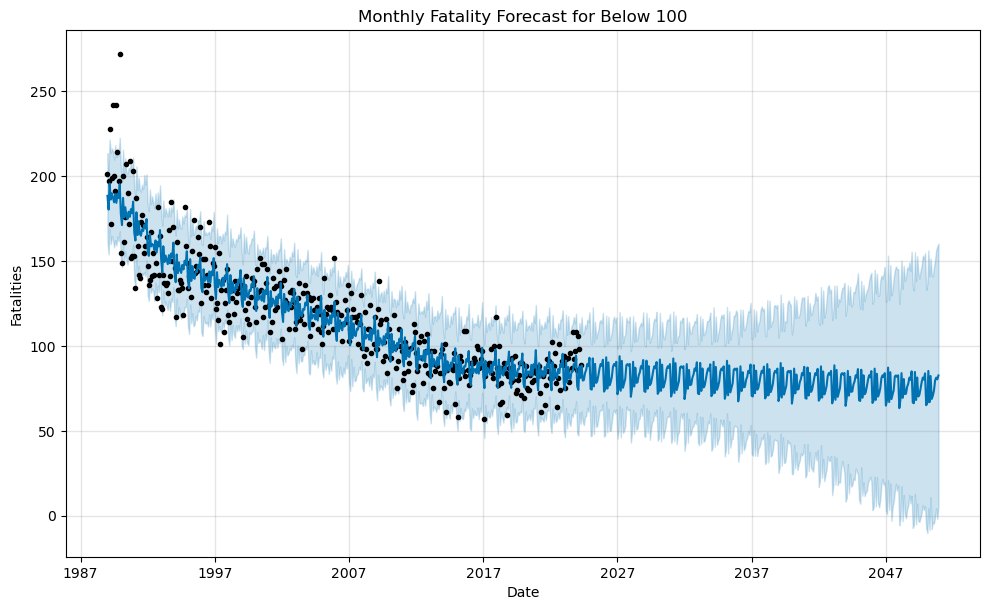

Actual fatalities for 2024:
Speed_Category  Above 100  Below 100
Date                                
2024-01-01             12         86
2024-02-01              7        106
2024-03-01             15         98
2024-04-01             25         89


In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)

# پاک‌سازی ستون "Speed Limit"
def clean_speed_limit(value):
    if isinstance(value, str):
        if '<' in value:
            return int(value.replace('<', ''))
        elif '>' in value:
            return int(value.replace('>', ''))
    try:
        return int(value)
    except ValueError:
        return None  # در صورت ناتوانی در تبدیل، مقدار None بازگردانده می‌شود

data['Speed Limit'] = data['Speed Limit'].apply(clean_speed_limit)

# حذف مقادیر نان
data = data.dropna(subset=['Speed Limit'])

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# دسته‌بندی داده‌ها بر اساس محدودیت سرعت
data['Speed_Category'] = data['Speed Limit'].apply(lambda x: 'Above 100' if x > 100 else 'Below 100')

# تجمیع داده‌ها بر اساس تاریخ و دسته‌بندی محدودیت سرعت
fatalities_by_speed_month = data.groupby(['Date', 'Speed_Category']).size().reset_index(name='Fatalities')

# آماده‌سازی یک دیکشنری برای ذخیره پیش‌بینی‌ها
forecasts = {}

# لیست دسته‌بندی‌های سرعت در دیتاست
speed_categories = fatalities_by_speed_month['Speed_Category'].unique()

# افق پیش‌بینی (ماه‌ها)
latest_date = fatalities_by_speed_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

for speed_category in speed_categories:
    # آماده‌سازی داده‌ها برای Prophet
    speed_data = fatalities_by_speed_month[fatalities_by_speed_month['Speed_Category'] == speed_category][['Date', 'Fatalities']]
    speed_data.columns = ['ds', 'y']

    # ایجاد و آموزش مدل Prophet
    model = Prophet(
        interval_width=0.95,
        yearly_seasonality=True,
        daily_seasonality=False,
        weekly_seasonality=False
    )
    model.fit(speed_data)

    # ایجاد یک DataFrame برای نگهداری تاریخ‌های آینده
    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')

    # انجام پیش‌بینی
    forecast = model.predict(future)

    # ذخیره پیش‌بینی در دیکشنری
    forecasts[speed_category] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # استخراج پیش‌بینی‌های سه ماه اول 2024
    forecast_2024_q1 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(f'Predictions for {speed_category} - Q1 2024:')
    print(forecast_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # رسم نمودار پیش‌بینی
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {speed_category}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.savefig(f'forecast_monthly_{speed_category}.png')  # ذخیره نمودار به عنوان فایل تصویر
    plt.show()

# استخراج داده‌های واقعی برای سال 2024
actual_2024 = fatalities_by_speed_month[(fatalities_by_speed_month['Date'] >= '2024-01-01') & (fatalities_by_speed_month['Date'] <= '2024-12-31')]
actual_2024 = actual_2024.pivot(index='Date', columns='Speed_Category', values='Fatalities').fillna(0)
print('Actual fatalities for 2024:')
print(actual_2024)


16:40:34 - cmdstanpy - INFO - Chain [1] start processing
16:40:34 - cmdstanpy - INFO - Chain [1] done processing


Predictions for 0_to_16 - Q1 2024:
            ds      yhat  yhat_lower  yhat_upper
418 2024-01-01  4.004203   -2.676291   10.954350
419 2024-02-01  2.834237   -3.814982    9.708639
420 2024-03-01  3.912925   -2.648392   10.280938


<Figure size 1000x600 with 0 Axes>

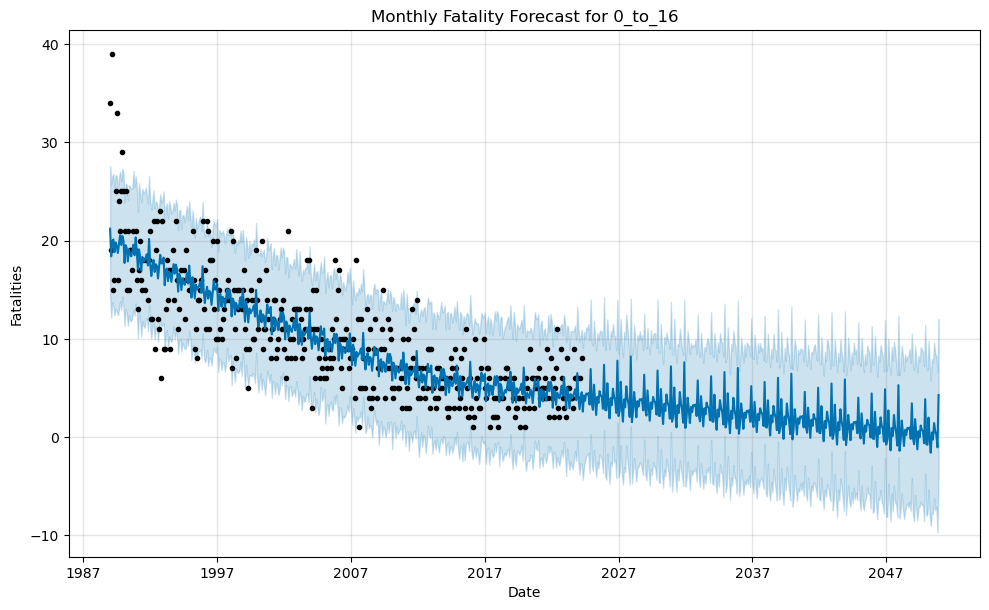

16:40:35 - cmdstanpy - INFO - Chain [1] start processing
16:40:35 - cmdstanpy - INFO - Chain [1] done processing


Predictions for 17_to_25 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  15.612019    1.866422   29.161401
421 2024-02-01  11.356077   -2.712344   25.073654
422 2024-03-01  18.687728    5.321201   32.310160


<Figure size 1000x600 with 0 Axes>

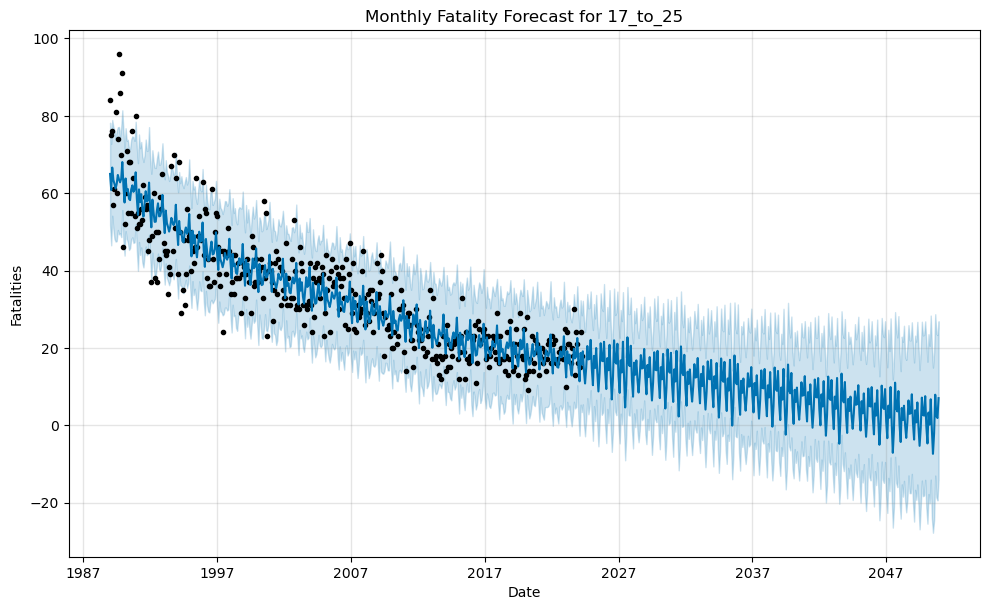

16:40:35 - cmdstanpy - INFO - Chain [1] start processing
16:40:35 - cmdstanpy - INFO - Chain [1] done processing


Predictions for 26_to_39 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  19.713082    7.532394   31.968513
421 2024-02-01  18.884985    7.019934   30.386140
422 2024-03-01  22.059496    9.965260   33.660222


<Figure size 1000x600 with 0 Axes>

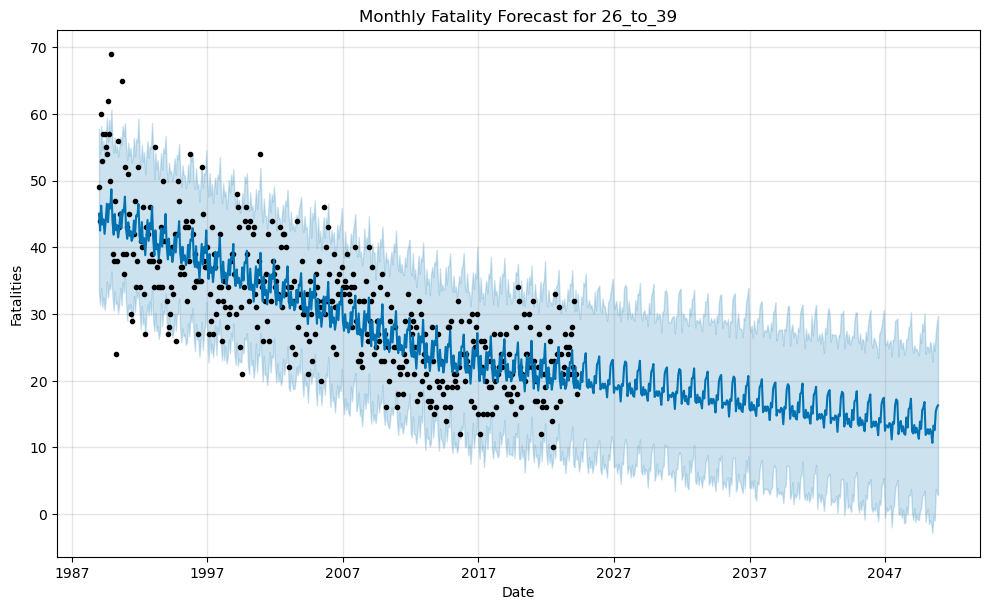

16:40:36 - cmdstanpy - INFO - Chain [1] start processing
16:40:36 - cmdstanpy - INFO - Chain [1] done processing


Predictions for 40_to_64 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  29.689520   16.873029   42.171332
421 2024-02-01  28.617545   15.585356   41.359587
422 2024-03-01  31.913471   19.646322   43.569620


<Figure size 1000x600 with 0 Axes>

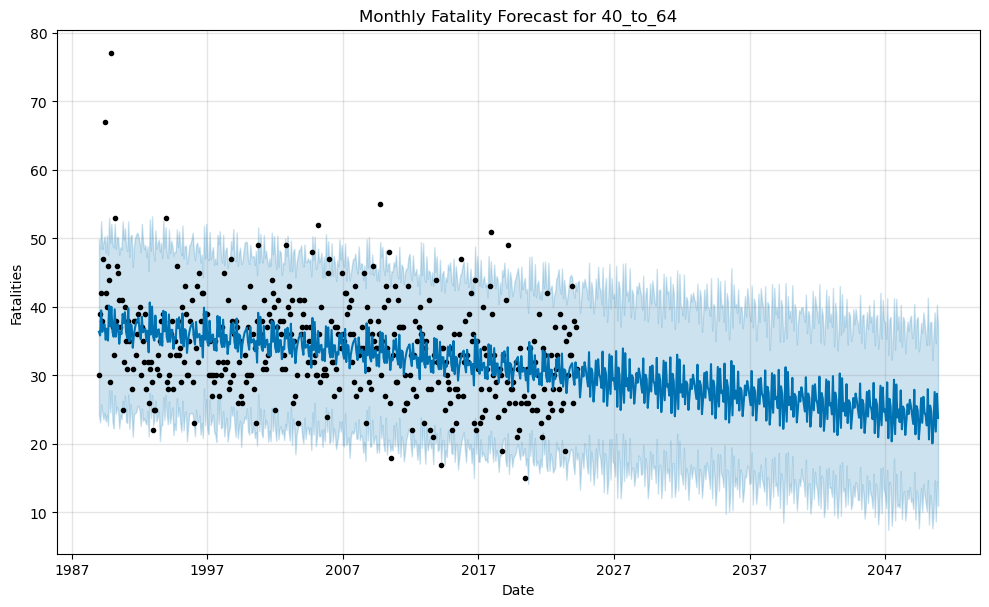

16:40:36 - cmdstanpy - INFO - Chain [1] start processing
16:40:36 - cmdstanpy - INFO - Chain [1] done processing


Predictions for 65_to_74 - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01   8.859106    2.736128   15.051573
421 2024-02-01   8.449716    2.126634   15.071612
422 2024-03-01  10.311428    4.183301   16.453069


<Figure size 1000x600 with 0 Axes>

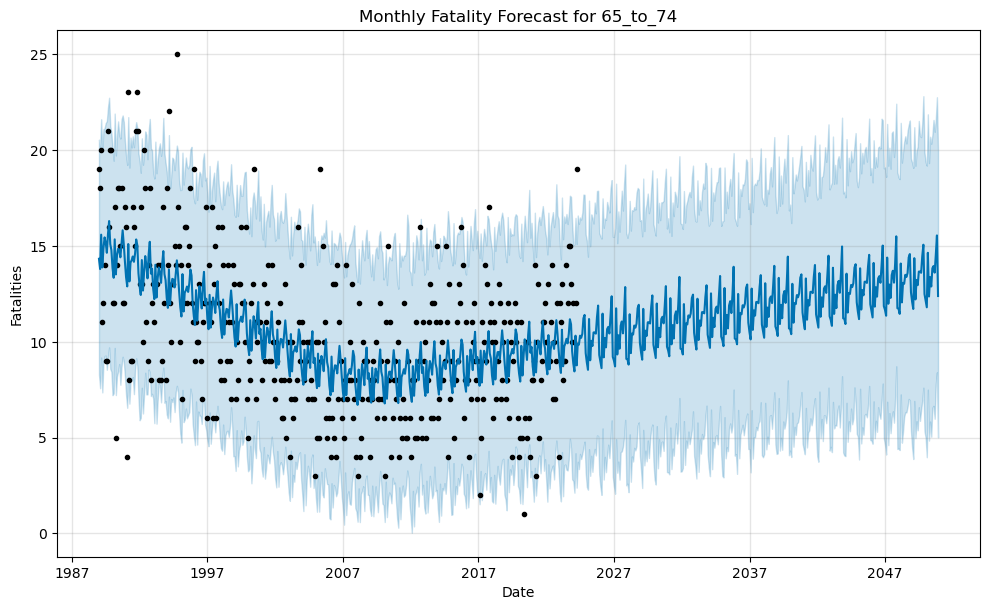

16:40:37 - cmdstanpy - INFO - Chain [1] start processing
16:40:37 - cmdstanpy - INFO - Chain [1] done processing


Predictions for 75_or_older - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  10.345181    3.329625   17.958426
421 2024-02-01   9.397142    2.693244   17.287902
422 2024-03-01  12.036258    5.211738   19.147990


<Figure size 1000x600 with 0 Axes>

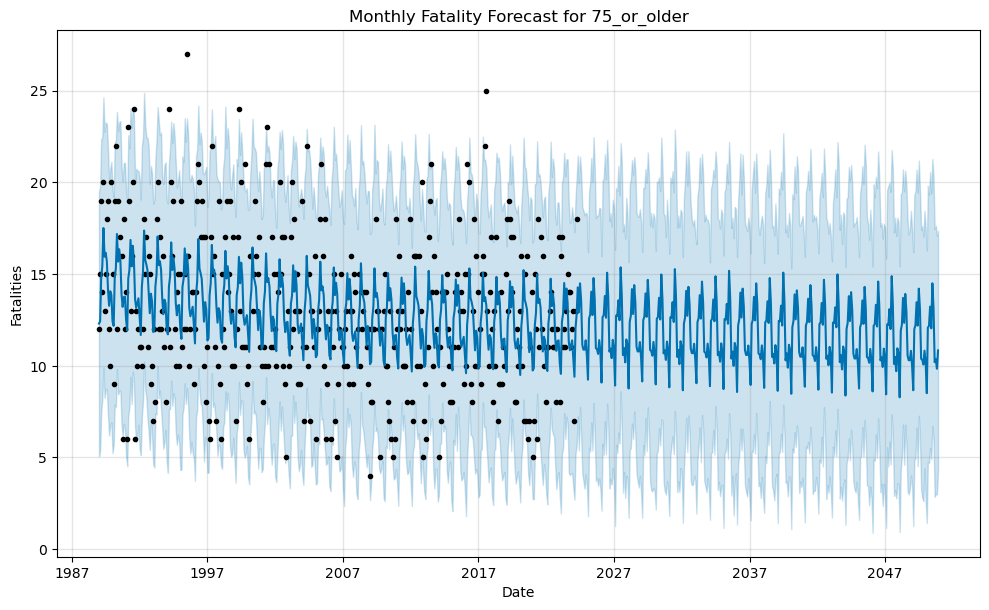

16:40:37 - cmdstanpy - INFO - Chain [1] start processing
16:40:37 - cmdstanpy - INFO - Chain [1] done processing


Predictions for -9 - Q1 2024:
           ds      yhat  yhat_lower  yhat_upper
68 2024-01-01  2.670410    0.929592    4.328315
69 2024-02-01  2.674764    0.894171    4.223964
70 2024-03-01  1.820000    0.064632    3.510817


<Figure size 1000x600 with 0 Axes>

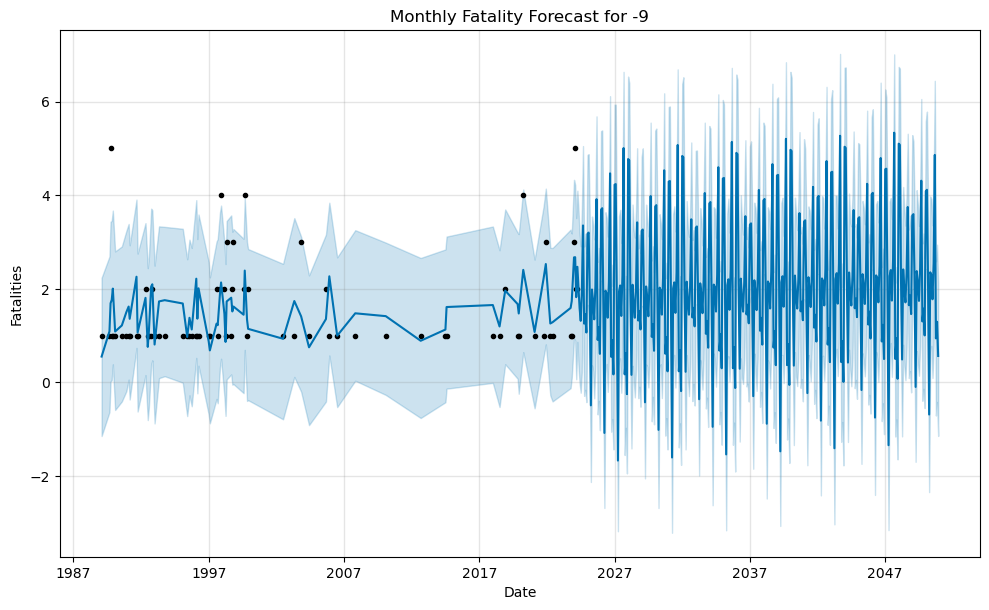

In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Age Group'] = data['Age Group'].astype(str)

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# تجمیع داده‌ها بر اساس تاریخ و گروه سنی
fatalities_by_age_month = data.groupby(['Date', 'Age Group']).size().reset_index(name='Fatalities')

# آماده‌سازی یک دیکشنری برای ذخیره پیش‌بینی‌ها
forecasts = {}

# لیست گروه‌های سنی در دیتاست
age_groups = fatalities_by_age_month['Age Group'].unique()

# افق پیش‌بینی (ماه‌ها)
latest_date = fatalities_by_age_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

for age_group in age_groups:
    # آماده‌سازی داده‌ها برای Prophet
    age_data = fatalities_by_age_month[fatalities_by_age_month['Age Group'] == age_group][['Date', 'Fatalities']]
    age_data.columns = ['ds', 'y']

    # ایجاد و آموزش مدل Prophet
    model = Prophet(
        interval_width=0.95,
        yearly_seasonality=True,
        daily_seasonality=False,
        weekly_seasonality=False
    )
    model.fit(age_data)

    # ایجاد یک DataFrame برای نگهداری تاریخ‌های آینده
    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')

    # انجام پیش‌بینی
    forecast = model.predict(future)

    # ذخیره پیش‌بینی در دیکشنری
    forecasts[age_group] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # استخراج پیش‌بینی‌های سه ماه اول 2024
    forecast_2024_q1 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(f'Predictions for {age_group} - Q1 2024:')
    print(forecast_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # رسم نمودار پیش‌بینی
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {age_group}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.savefig(f'forecast_monthly_{age_group}.png')  # ذخیره نمودار به عنوان فایل تصویر
    plt.show()


16:39:18 - cmdstanpy - INFO - Chain [1] start processing
16:39:18 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for 0_to_16 - Year 2023:
MAE: 2.7615437482908347
MSE: 10.543859993503267
RMSE: 3.2471310403960087


<Figure size 1000x600 with 0 Axes>

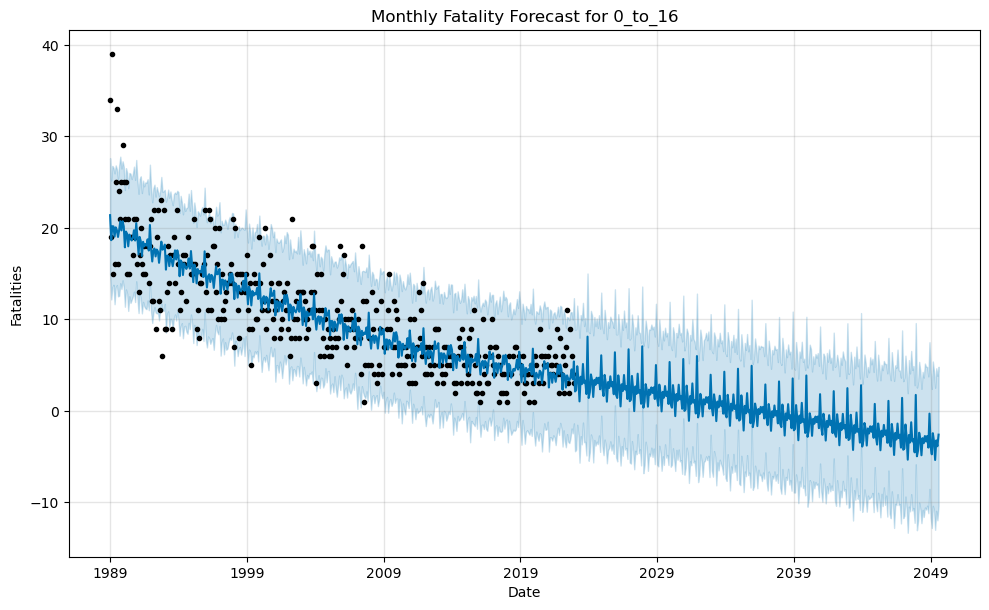

16:39:19 - cmdstanpy - INFO - Chain [1] start processing
16:39:19 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for 17_to_25 - Year 2023:
MAE: 7.568355585140462
MSE: 75.90491232372545
RMSE: 8.712342527915524


<Figure size 1000x600 with 0 Axes>

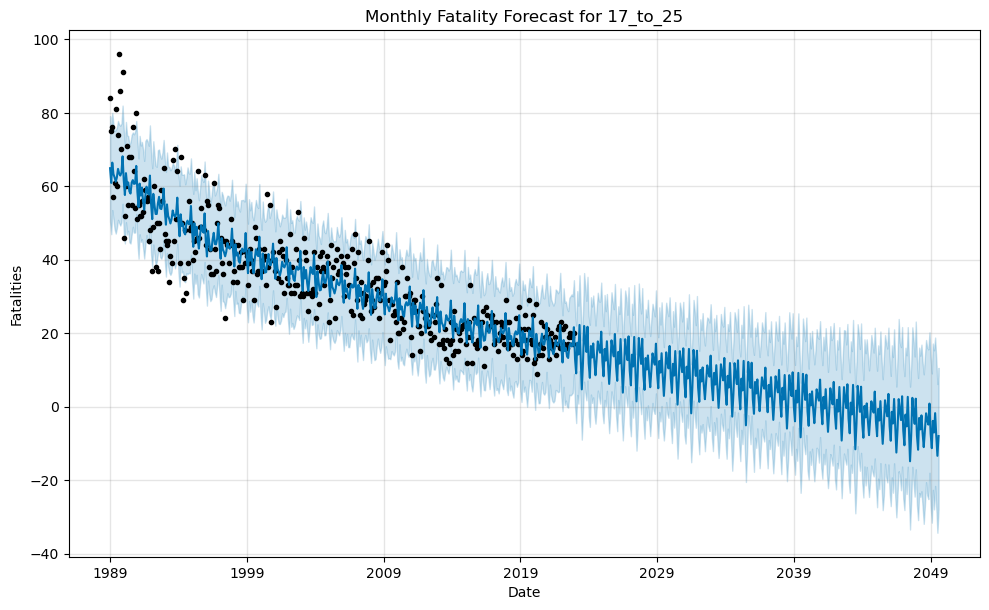

16:39:19 - cmdstanpy - INFO - Chain [1] start processing
16:39:19 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for 26_to_39 - Year 2023:
MAE: 4.634589630426723
MSE: 31.718049183561522
RMSE: 5.631877944661223


<Figure size 1000x600 with 0 Axes>

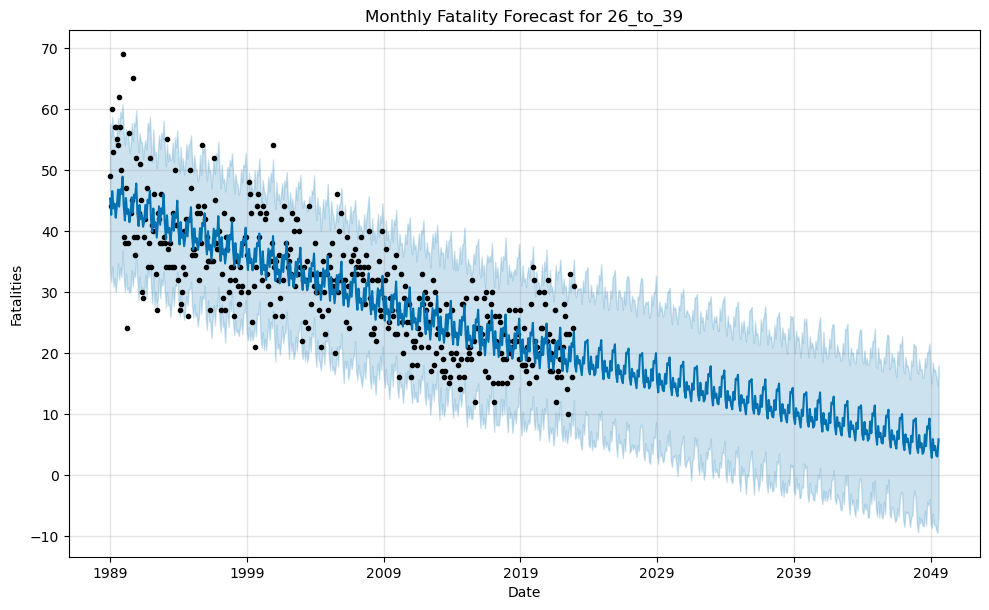

16:39:19 - cmdstanpy - INFO - Chain [1] start processing
16:39:19 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for 40_to_64 - Year 2023:
MAE: 6.77339298355714
MSE: 58.740976990587875
RMSE: 7.6642662395423


<Figure size 1000x600 with 0 Axes>

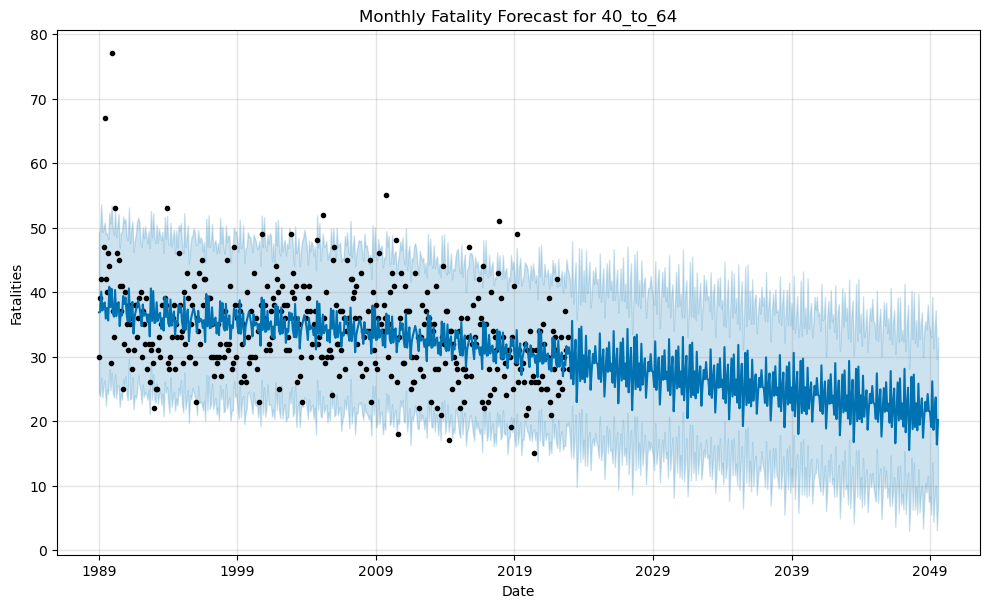

16:39:20 - cmdstanpy - INFO - Chain [1] start processing
16:39:20 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for 65_to_74 - Year 2023:
MAE: 3.0650471777929558
MSE: 13.086488700149618
RMSE: 3.61752521762456


<Figure size 1000x600 with 0 Axes>

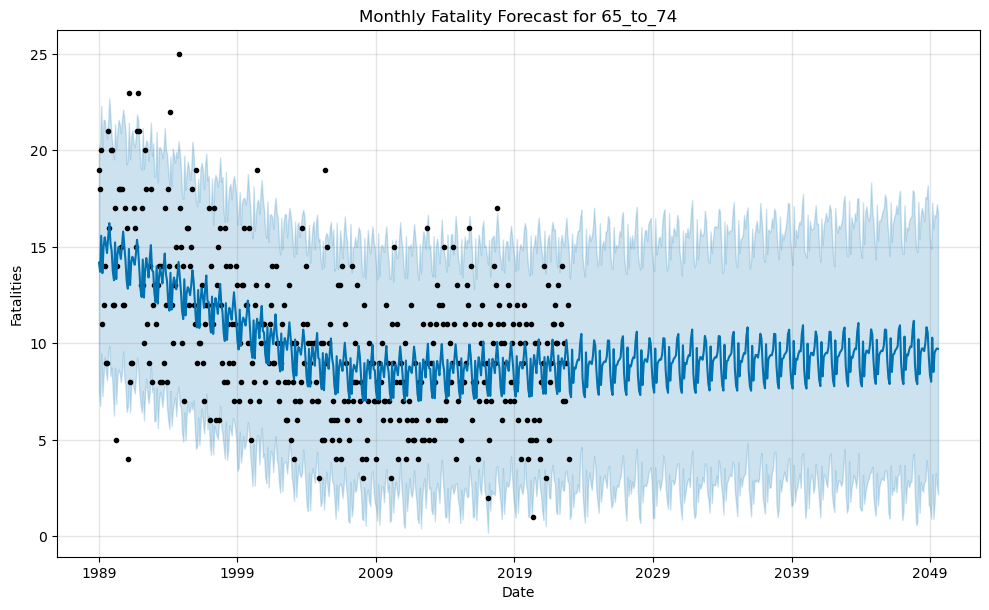

16:39:20 - cmdstanpy - INFO - Chain [1] start processing
16:39:20 - cmdstanpy - INFO - Chain [1] done processing


Evaluation for 75_or_older - Year 2023:
MAE: 2.476759418526892
MSE: 8.946233521059035
RMSE: 2.9910254965578336


<Figure size 1000x600 with 0 Axes>

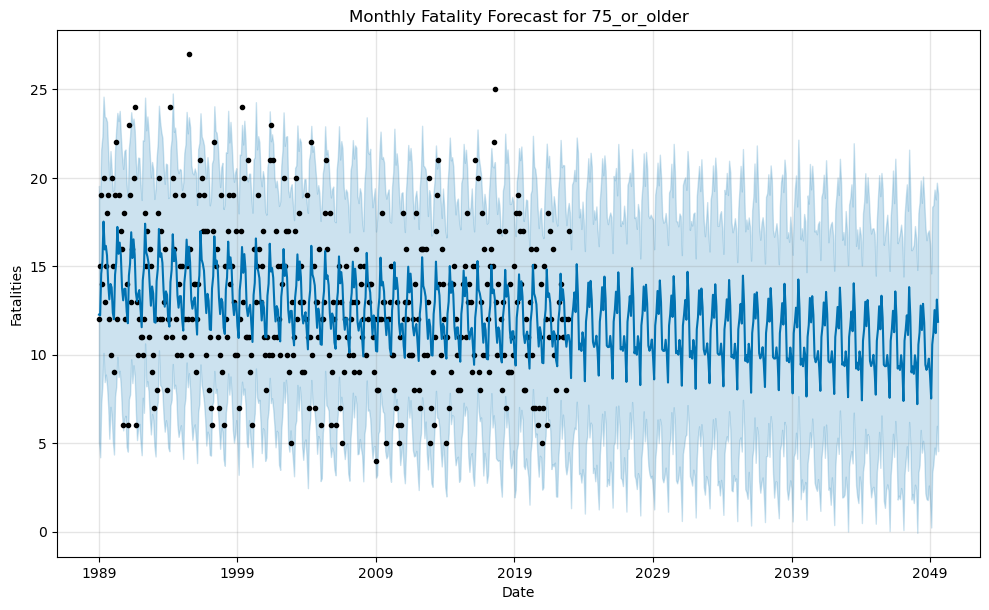

16:39:20 - cmdstanpy - INFO - Chain [1] start processing
16:39:21 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Found input variables with inconsistent numbers of samples: [2, 12]

In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Age Group'] = data['Age Group'].astype(str)

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))

# تجمیع داده‌ها بر اساس تاریخ و گروه سنی
fatalities_by_age_month = data.groupby(['Date', 'Age Group']).size().reset_index(name='Fatalities')

# آماده‌سازی یک دیکشنری برای ذخیره پیش‌بینی‌ها
forecasts = {}

# لیست گروه‌های سنی در دیتاست
age_groups = fatalities_by_age_month['Age Group'].unique()

# افق پیش‌بینی (ماه‌ها)
latest_date = fatalities_by_age_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

# دوره آموزشی تا پایان سال 2022
train_end_date = '2022-12-31'

for age_group in age_groups:
    # آماده‌سازی داده‌ها برای Prophet
    age_data = fatalities_by_age_month[fatalities_by_age_month['Age Group'] == age_group][['Date', 'Fatalities']]
    age_data.columns = ['ds', 'y']
    
    # تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
    train_data = age_data[age_data['ds'] <= train_end_date]
    test_data = age_data[(age_data['ds'] > train_end_date) & (age_data['ds'] <= '2023-12-31')]

    # ایجاد و آموزش مدل Prophet
    model = Prophet(
        interval_width=0.95,
        yearly_seasonality=True,
        daily_seasonality=False,
        weekly_seasonality=False
    )
    model.fit(train_data)

    # ایجاد یک DataFrame برای نگهداری تاریخ‌های آینده
    future = model.make_future_dataframe(periods=forecast_horizon, freq='M')

    # انجام پیش‌بینی
    forecast = model.predict(future)

    # ذخیره پیش‌بینی در دیکشنری
    forecasts[age_group] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # ارزیابی مدل برای سال 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]
    test_data = test_data.set_index('ds')
    forecast_2023 = forecast_2023.set_index('ds')
    
    mae = mean_absolute_error(test_data['y'], forecast_2023['yhat'])
    mse = mean_squared_error(test_data['y'], forecast_2023['yhat'])
    rmse = mean_squared_error(test_data['y'], forecast_2023['yhat'], squared=False)
    
    print(f'Evaluation for {age_group} - Year 2023:')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

    # رسم نمودار پیش‌بینی
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {age_group}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.show()
